# Sharing Project Approaches (SPA) group
> Thomas Huet, University of Oxford, project EAMENA <br>
> <sup> Thu 22 Feb, 2024 </sup>

In [ ]:
# @title
from IPython.display import display, HTML, IFrame, Markdown
import requests, json

: 

## ACHP organisation
> Arches Cultural Heritage Partners GitHub organisation

<div>
<center>

<img src = "https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/arches-achp-header.png" width = "600">

<sup><img src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" vertical-align="middle;" width="30"> <https://github.com/achp-project></sup>

</center>
</div>

talk: ["Shared heritage"](https://colab.research.google.com/github/achp-project/cultural-heritage/blob/main/presentation/bhdc/rm_compar.ipynb) *at the* Big Historical Data conference - Environments of big cultural heritage data integration <sup> 22-25 Nov 2023, Jena, Germany, Max Planck Institute of Geoanthropology, https://bhdc.earth/</sup>





In [5]:
# @title Geographic scope
# download ACHP graph_mixer
!rm cultural-heritage -R > /dev/null 2>&1
!git clone https://github.com/achp-project/cultural-heritage.git > /dev/null 2>&1
%cd /content/cultural-heritage/graph-parser/
import graph_mixer as gm
%cd /content/
gm.projects_extent()

/content/cultural-heritage/graph-parser
/content


## Privilegied IT



### JSON <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-format-json.png' width = "30px">

The most popular data format on the web. GeoJSON serves as the native format for <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prog-stack-arches-1.png' width = "80px">, encompassing resource coordinates, map search, reports, and the API.

| Description |  |
|----------|----------|
| Geoweb<br><img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/geojson-io-logo.png' width = "60px"> | <a href="https://geojson.io/"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/www/geojson-io-1.png" width="850px"> </a> |
| Edit<br>Coordinates | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-mbr.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-mbr.png" width="850px"> </a> |
| Export | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-export.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-export.png" width="850px"> </a> |
| Arches<br>API | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png" width="850px"> </a> |
| Arches API<br>to<br>Zenodo API | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/arches-v7-export-citation-1.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/arches-v7-export-citation-1.png" width="850px"> </a> |
| GeoJSON<br>displayed<br>on GitHub | <a href="https://github.com/eamena-project/eamena-arches-dev/blob/main/data/geojson/caravanserail.geojson"> <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-github.png' width = "850px"> </a> |

JavaScript <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js.png' width = "25px"> is the most popular language for web interactivity, supported by libraries such as <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-geo-leaflet.png' width = "90px"> and <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-plotly.png' width = "80px">.




### GitHub <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-github.png' width = "30px">

The most popular web platform for source code management and sharing code (the future of <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prog-stack-arches-1.png' width = "80px">) and data is GitHub. GitHub enables the creation of releases, and Zenodo can then be used to generate a DOI for each release.

| Description |  |
|----------|----------|
| Zenodo<br>release<br><img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/lod-doi.png' width = "30px"> | <a href="https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-zenodo-github-release.png"> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-zenodo-github-release.png' width = "850px"> </a> |
| Zenodo<br>community | <a href="https://zenodo.org/communities/eamena"><img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/zenodo-communities-eamena.png' width = "850px"></a> |
| Zenodo<br>OAI-PMH API | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/zenodo-metadata-eamena.png"><img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/zenodo-metadata-eamena.png' width = "850px"></a>  |



### Python <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-python-2.png' width = "30px">

The most popular programming language in the world, and the main language used in <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prog-stack-arches-1.png' width = "80px"> (e.g., for plugins), is Python. Python offers numerous libraries, including:


| Python libraries |  Description|
|----------|----------|
| `json` | local <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-js-format-json.png' width = "50px"> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-js-format-geojson.png' width = "50px"> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/lod-format-jsonld.png' width = "50px">|
| `requests` | GitHub<br>hosted <a href="https://github.com/eamena-project/eamena-arches-dev/blob/main/data/geojson/caravanserail.geojson"> <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-github.png' width = "800px"> </a> <br> REST API <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png"> <img src="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/geojson-url.png" width="800px"> </a> |
| `rdflib` | <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-python-rdflib.png' width = "50px"> </a> |

* Processing

| Python libraries |  Description|
|----------|----------|
| `ee` <br> Python API | <a href="https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/app-prg-python-ee-hp-satellite.png"> <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/app-prg-python-ee-hp-satellite.png' width = "1200px"> </a>|

Share data and code, Python <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-python-2.png' width = "30px"> coding hosted on GitHub <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-github.png' width = "30px"> in a Jupyter Notebook <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-python-jupyter.png' width = "35px"> and mirrored on Google Colab <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-google-colab.png' width = "50px">

### R <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-r.png' width = "30px">

The most popular programming language in Archaeology. Development of the *eamenaR* package <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/eamenaR_logo.png' width = "35px"> dedicated to the EAMENA database (*work in progress*)


| Description |  |
|----------|----------|
| Statistics | <img src='https://raw.githubusercontent.com/eamena-project/eamenar/master/results/MAPSS_ThreatDriverType_pie.png' width = "600px"> |
| Interactivity <br> <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prg-r-pkg-shiny.png' width = "40px"> | <img src='https://raw.githubusercontent.com/eamena-project/eamenar/master/results/edtf_plotly_category_ym.png' width = "800px"> |





In [2]:
# @title Interoperability over Arches projects
!rm nodes_uuids.py
!wget https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/main/dbs/database.eamena/data/reference_data/uuids/nodes_uuids.py > /dev/null 2>&1
import nodes_uuids
from nodes_uuids import nodes_uuids
df_nodes = nodes_uuids(rm = "https://raw.githubusercontent.com/eamena-project/eamena/master/eamena/pkg/graphs/resource_models/Heritage%20Place.json")
df_nodes.head(10)

rm: cannot remove 'nodes_uuids.py': No such file or directory


,db.concept.name,db.concept.uuid
1,BP Date To,173ff15a-c5fb-11ea-9026-02e7594ce0a0
2,Geometry,3080eebe-c2c5-11ea-9026-02e7594ce0a0
3,Resource Summary,34cfe98f-c2c0-11ea-9026-02e7594ce0a0
4,EAMENA ID,34cfe992-c2c0-11ea-9026-02e7594ce0a0
5,Marine Environment,34cfe998-c2c0-11ea-9026-02e7594ce0a0
6,Disturbance Cause Assignment,34cfe99e-c2c0-11ea-9026-02e7594ce0a0
7,Archaeological Certainty Observation,34cfe9a4-c2c0-11ea-9026-02e7594ce0a0
8,Damage State,34cfe9aa-c2c0-11ea-9026-02e7594ce0a0
9,Heritage Place Assignment,34cfe9ad-c2c0-11ea-9026-02e7594ce0a0
10,Site Feature Form Type Belief,34cfe9b0-c2c0-11ea-9026-02e7594ce0a0


Interoperability of the package <img src='https://raw.githubusercontent.com/eamena-project/eamena-arches-dev/master/www/eamenaR_logo.png' width = "35px"> to other <img src='https://raw.githubusercontent.com/zoometh/thomashuet/master/img/app-prog-stack-arches-1.png' width = "80px"> databases through a fieldnames <-> UUIDs mapping table (*work in progress*)

## Reference data integration in EAMENA-MaREA

In [7]:
# @title EAMENA graphs
json_url = 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json'
response = requests.get(json_url)
data = response.json()
json_str = json.dumps(data, indent=4)
scrollable_box = f"""
<div style="border: 1px solid black; overflow-y: scroll; height: 300px; padding: 10px; background-color: #f9f9f9;">
<pre>{json_str}</pre>
</div>
"""
display(HTML(scrollable_box))

In [ ]:
# @title Field description
IFrame('https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/rm/hp/mds/fields-description.html', width="100%", height=500)

In [ ]:
# @title Field groups and values
IFrame('https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/rm/hp/mds/field-to-tsv.html', width="40%", height=400)

In [ ]:
# @title Field minimun standard
IFrame('https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/rm/hp/mds/mds-reference.html', width="100%", height=600)

Workflow

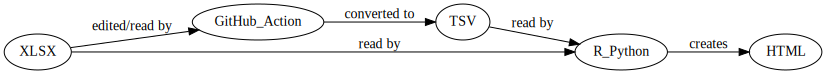

In [ ]:
# @title
from graphviz import Digraph

dot = Digraph()
dot.attr(rankdir='LR')
# nodes
dot.node('XLSX', 'XLSX', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template.xlsx", target="_blank")
dot.node('GitHub_Action', 'GitHub_Action', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/.github/workflows/bu-to-tsv.yml", target="_blank")
dot.node('TSV', 'TSV', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template-readonly.tsv", target="_blank")
dot.node('R_Python', 'R_Python', URL="https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/convert_xlsx_to_tsv.py", target="_blank")
dot.node('HTML', 'HTML', URL="https://eamena-project.github.io/eamena-arches-dev/dbs/database.eamena/data/reference_data/mds/field-to-tsv.html", target="_blank")
# links
dot.edge('XLSX', 'GitHub_Action', label=' edited/read by ')
dot.edge('GitHub_Action', 'TSV', label=' converted to ')
dot.edge('TSV', 'R_Python', label=' read by ')
dot.edge('XLSX', 'R_Python', label=' read by ')
dot.edge('R_Python', 'HTML', label=' creates ')
dot.render('workflow_diagram', format='png', view=True)
dot

In [8]:
# @title PeriodO
IFrame('https://n2t.net/ark:/99152/p0m64td', width="100%", height=600)

## Arches-based Resource Models (RM) modeling and semantization

In [ ]:
# @title Load GitHub repository, requirements and libraries
# download ACHP graph_mixer
!rm cultural-heritage -R > /dev/null 2>&1
!git clone https://github.com/achp-project/cultural-heritage.git > /dev/null 2>&1
# !pip install  -q -r  cultural-heritage/graph-parser/requirements.txt
!pip install pyvis rdflib > /dev/null 2>&1
# !pip install
%cd /content/cultural-heritage/graph-parser/

# import
import graph_mixer as gm
import graph_rdf as grdf
# download EAMENA erms
%cd /content/
!rm eamena-functions -R > /dev/null 2>&1
!git clone https://github.com/eamena-project/eamena-functions.git > /dev/null 2>&1
%cd /content/eamena-functions/mds
import mds
# librairies
import os
import urllib.request
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import re
from IPython.display import HTML
from pyvis import network as net
import folium
import json
from google.colab import files

/content/cultural-heritage/graph-parser
/content
/content/eamena-functions/mds


In [ ]:
# @title List of available RMs
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R
!mkdir -p inputResourceModels
remote_source_files = gm.rm_list()
remote_source_files

/content/cultural-heritage/graph-parser
rm: cannot remove 'inputResourceModels': No such file or directory


{'CAAL': 'https://raw.githubusercontent.com/achp-project/prj-caal/main/resource_models/arches/CAAL-SitesAndMonuments.json',
 'EAMENA': 'https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json',
 'MAEASAM': 'https://raw.githubusercontent.com/achp-project/prj-maeasam/main/Site.json',
 'MAHS': 'https://raw.githubusercontent.com/achp-project/prj-mahs/main/Site.json',
 'MAHSA': 'https://raw.githubusercontent.com/achp-project/prj-mahsa/main/resource-models/Heritage%20Location%20Resource%20Model.json',
 'MAPHSA': 'https://raw.githubusercontent.com/achp-project/prj-maphsa/heritage_branch/resource_model/MAPHSA%20Heritage%20Location%20Resource%20Model%20v0.44.json',
 'MAPSS': 'https://raw.githubusercontent.com/achp-project/prj-mapss/main/pkg/graphs/Heritage%20Place%20(3).json'}

Select the EAMENA HP Resource Model (RM) within the listed RMs

In [ ]:
# @title Select EAMENA Heritage Places RM
rm_project= 'EAMENA'
%cd /content/cultural-heritage/graph-parser/
!rm inputResourceModels -R > /dev/null 2>&1
!mkdir -p inputResourceModels > /dev/null 2>&1
remote_source_files = gm.rm_list()
infile = remote_source_files[rm_project]
gm.rm_selected_one('EAMENA', remote_source_files)

Other keys/projects: `MAPSS`, `MAHS`, etc.

In [ ]:
# @title Show the Entity-relationships diagram (ERD) of the RM
import pandas as pd

!python /content/cultural-heritage/graph-parser/graph_comparator.py -d -m list -o subgraphMetrics.csv inputResourceModels/*.json
subgraph_metrics = pd.read_csv('subgraphMetrics.csv')
filename = rm_project + "-erd.html"
mds_template_df = mds.mds_template()
mds_template_df['Enhanced record minimum standard'] = mds_template_df['Enhanced record minimum standard'].str.contains(r'Yes', case = False, na = False, regex = True).astype(int)
mds_template_df = mds_template_df.loc[mds_template_df['Enhanced record minimum standard'] == 1]
in_erms = list(mds_template_df['uuid_sql'])
G = gm.create_rm_graph(rm_project= rm_project, color_fields = mds_template_df)
hp_G = gm.plot_net_graph(G, filename = filename, width = "1200px", height = "1000px")
HTML(filename = filename)
## Warnings in EAMENA
## There are 2 "Disturbance Event Timespan" subgraphs

## Uncomment to export
# files.download(filename)


Colored nodes are the MDS ones according to the [mds-template-readonly.tsv](https://github.com/eamena-project/eamena-arches-dev/blob/main/dbs/database.eamena/data/reference_data/mds/mds-template-readonly.tsv) file (see: [MDS](https://github.com/eamena-project/eamena-arches-dev/tree/main/dbs/database.eamena/data/reference_data#mds))

In [ ]:
# @title RDF serialization
print(grdf.to_rdf('https://raw.githubusercontent.com/achp-project/prj-eamena-marea/main/resource_models/Heritage%20Place.json', outformat = 'json-ld'))

[
  {
    "@id": "http://prj-eamena-marea#34cfea86-c2c0-11ea-9026-02e7594ce0a0",
    "@type": [
      "http://www.w3.org/2000/01/rdf-schema#Class"
    ],
    "http://purl.org/dc/elements/1.1/title": [
      {
        "@value": "Dimension Type"
      }
    ],
    "http://www.w3.org/2000/01/rdf-schema#subClassOf": [
      {
        "@id": "http://www.cidoc-crm.org/cidoc-crm/E55_Type"
      }
    ]
  },
  {
    "@id": "http://prj-eamena-marea#34cfea4e-c2c0-11ea-9026-02e7594ce0a0",
    "@type": [
      "http://www.w3.org/2000/01/rdf-schema#Class"
    ],
    "http://purl.org/dc/elements/1.1/title": [
      {
        "@value": "Material Type"
      }
    ],
    "http://www.w3.org/2000/01/rdf-schema#subClassOf": [
      {
        "@id": "http://www.cidoc-crm.org/cidoc-crm/E57_Material"
      }
    ]
  },
  {
    "@id": "http://prj-eamena-marea#34cfea1c-c2c0-11ea-9026-02e7594ce0a0",
    "@type": [
      "http://www.w3.org/2000/01/rdf-schema#Class"
    ],
    "http://purl.org/dc/elements/1.1/ti